1) **Identify successful countries & athletes**
-Focus on top-performing nations and athletes to target for collaborations.

-Helps in selecting regions and personalities for promotional activities. *italicized text*

2) **Track emerging sports trends**

-Monitor shifts in sports popularity across markets.

-Recognize rising athlete demographics (age groups, regions, sports categories).

3) **Spot new opportunities**

-Identify upcoming markets or sports gaining attention.

-Guide investment in partnerships and sponsorships with growing potential.** *italicized text*

The dataset for the 2024 Olympic Games in Paris on Kaggle contain of 14 CSV files, in total.

we will be concentrating on 3 files which are **teams.csv, athletes.csv and medalists.csv**

***Teams:***
This file provides details on the countries taking part in the Paris 2024 Olympics tournament It covers information, like the names of countries NOC codes,s and the count of athletes representing each nation

***Athletes:***
This file contains in depth details about every athlete such, as their name gender age sport and nationality It gives an overview of the athlete demographics participating in the Olympic Games

***Medalists:***
This file contains in depth details about the medal winning athletes such, as their names and the events they participated in to earn their medals

In [ ]:
from google.colab import files
upoaded = files.upload()

Saving athletes.csv to athletes (1).csv
Saving medallists.csv to medallists.csv
Saving teams.csv to teams (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio
import matplotlib.gridspec as gs
import warnings
from IPython.display import Image
from matplotlib import colors as mcolors

In [ ]:
teams = pd.read_csv('teams (1).csv')
medalist = pd.read_csv('medallists.csv')
athletes = pd.read_csv('athletes (1).csv')

In [ ]:
teams.head(2)

,code,current,team,team_gender,country_code,country,country_long,discipline,disciplines_code,events,athletes,coaches,athletes_codes,num_athletes,coaches_codes,num_coaches
0,ARCMTEAM3---CHN01,True,People's Republic of China,M,CHN,China,People's Republic of China,Archery,ARC,Men's Team,"['KAO Wenchao', 'LI Zhongyuan', 'WANG Yan']",NaN,"['1913366', '1913367', '1913369']",3.0,NaN,NaN
1,ARCMTEAM3---COL01,True,Colombia,M,COL,Colombia,Colombia,Archery,ARC,Men's Team,"['ARCILA Santiago', 'ENRIQUEZ Jorge', 'HERNAND...",NaN,"['1935642', '1543412', '1935644']",3.0,NaN,NaN


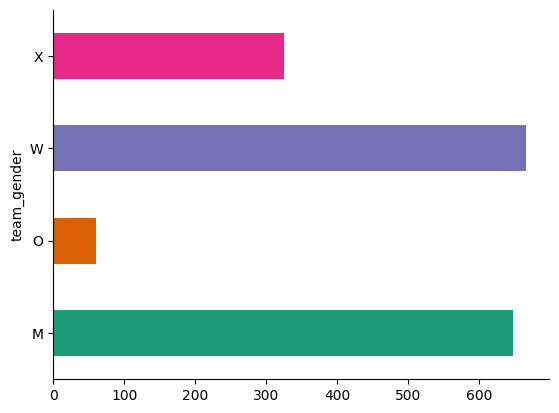

In [ ]:
# title team_gender

from matplotlib import pyplot as plt
import seaborn as sns
teams.groupby('team_gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/tmp/ipython-input-1664123463.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




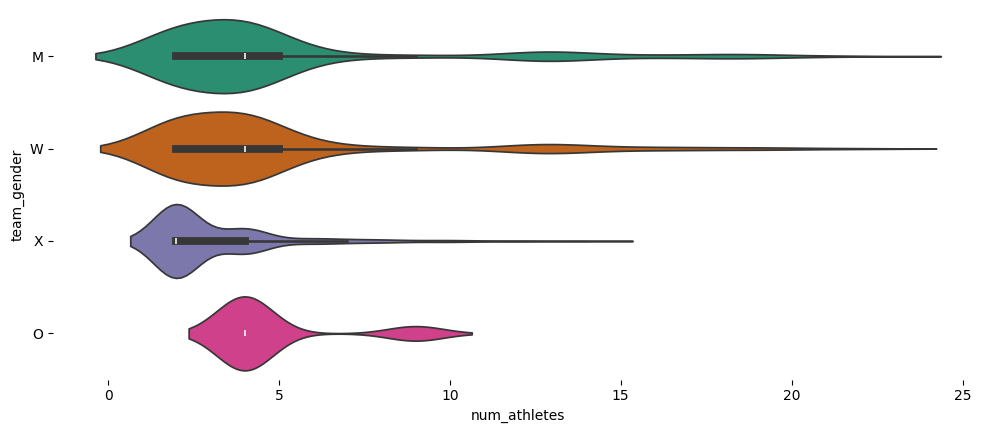

In [ ]:
# title team_gender vs num_athletes

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(teams['team_gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(teams, x='num_athletes', y='team_gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

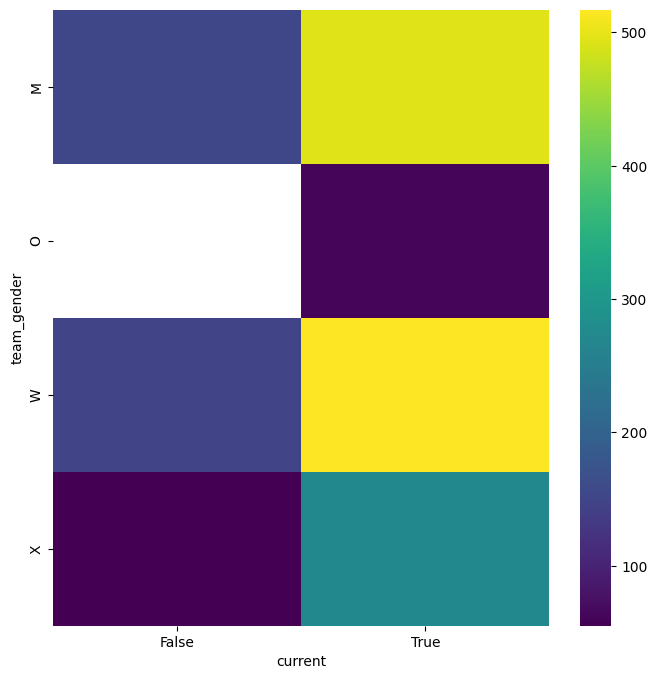

In [ ]:
# title current vs team_gender

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['team_gender'].value_counts()
    for x_label, grp in teams.groupby('current')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('current')
_ = plt.ylabel('team_gender')

In [ ]:
medalist.head(2)


,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality_code,nationality,...,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team,is_medallist
0,2024-07-27,Gold Medal,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN,True
1,2024-07-27,Silver Medal,2.0,GANNA Filippo,Male,ITA,Italy,Italy,ITA,Italy,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN,True


In [ ]:
athletes.head(2)

,code,current,name,name_short,name_tv,gender,function,country_code,country,country_long,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1532872,True,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,...,"Father, Gevorg Aleksanyan","Armenian, English, Russian","Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN
1,1532873,True,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,...,NaN,Armenian,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN


In [ ]:
df_teams = teams.drop(['coaches', 'coaches_codes', 'num_coaches'], axis=1)

df_athletes = athletes.drop(['birth_place', 'birth_country', 'residence_place','birth_place', 'residence_country',
                          'nickname','hobbies', 'occupation', 'education','family', 'lang', 'coach',
                          'reason','hero', 'influence', 'philosophy','sporting_relatives', 'ritual', 'other_sports',], axis=1)

df_medalist= medalist.drop(['team', 'team_gender', 'code_team'], axis=1)

In [ ]:
df_teams['events'].fillna('unknown', inplace=True)
df_medalist['url_event'].fillna('unknown', inplace=True)

/tmp/ipython-input-3041728159.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_teams['events'].fillna('unknown', inplace=True)
/tmp/ipython-input-3041728159.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
missing_count0 = df_teams.isnull().sum()
missing_count1 = df_athletes.isnull().sum()
missing_count2 = df_medalist.isnull().sum()
print("Total missing values :\n", missing_count0)
print("Total missing values :\n", missing_count1)
print("Total missing values :\n", missing_count2)

Total missing values :
 code                0
current             0
team                0
team_gender         0
country_code        0
country             0
country_long        0
discipline          0
disciplines_code    0
events              0
athletes            3
athletes_codes      3
num_athletes        3
dtype: int64
Total missing values :
 code                0
current             0
name                0
name_short          3
name_tv             3
gender              0
function            0
country_code        0
country             0
country_long        0
nationality         3
nationality_long    3
nationality_code    3
height              3
weight              5
disciplines         0
events              0
birth_date          0
dtype: int64
Total missing values :
 medal_date          0
medal_type          0
medal_code          1
name                0
gender              0
country_code        0
country             0
country_long        0
nationality_code    1
nationality         1


here we have to create a new df : df_country, this will map with country code which we will be using for vizualisation purpose


In [ ]:
df_country = df_medalist[['country_code', 'country']].drop_duplicates().set_index('country_code')

In [ ]:
df_country.head(2)

,country
country_code,
BEL,Belgium
ITA,Italy


In [ ]:
speed_sports_disciplines = ["Athletics", "Swimming", "3x3 Basketball", "Basketball", "Handball", "Hockey", "Football", "Rugby Sevens"]

In [ ]:
#preprocessing of data
# cheq for duplicates and null values
duplicates = df_teams[teams.duplicated()]
print("Number of duplicate rows:", len(duplicates))
missing_count = df_teams.isnull().sum()
print("Total missing values :\n", missing_count)

Number of duplicate rows: 0
Total missing values :
 code                0
current             0
team                0
team_gender         0
country_code        0
country             0
country_long        0
discipline          0
disciplines_code    0
events              0
athletes            3
athletes_codes      3
num_athletes        3
dtype: int64


In [ ]:
duplicates = df_athletes[athletes.duplicated()]
print("Number of duplicate rows:", len(duplicates))
missing_count = df_athletes.isnull().sum()
print("Total missing values :\n", missing_count)

Number of duplicate rows: 0
Total missing values :
 code                0
current             0
name                0
name_short          3
name_tv             3
gender              0
function            0
country_code        0
country             0
country_long        0
nationality         3
nationality_long    3
nationality_code    3
height              3
weight              5
disciplines         0
events              0
birth_date          0
dtype: int64


In [ ]:
duplicates = df_medalist[medalist.duplicated()]
print("Number of duplicate rows:", len(duplicates))
missing_count = df_medalist.isnull().sum()
print("Total missing values :\n", missing_count)

Number of duplicate rows: 0
Total missing values :
 medal_date          0
medal_type          0
medal_code          1
name                0
gender              0
country_code        0
country             0
country_long        0
nationality_code    1
nationality         1
nationality_long    1
discipline          0
event               0
event_type          0
url_event           0
birth_date          0
code_athlete        0
is_medallist        0
dtype: int64




1.   Visualisation of each dataframe indivulay
2.   Vizualisation 1: What are the sports with the most Teams   in   the tournament?
3.   Visualization 2: What are the countries with the most athletes?
4.   Visualization 3: what is the distribution of the medals in the diffrent Sports for Both Gender athletes?
5.   Visualization 4: Which countries Got the highest Medals in speed Sports?
6.   Visualization 5:Whats the best age to win a medal for diffrent sports?  




/tmp/ipython-input-105285463.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax0_sns = sns.barplot(data=discipline_counts_df, y='Discipline', x='Number of Teams', ax=ax0, width=0.6, palette=colors)


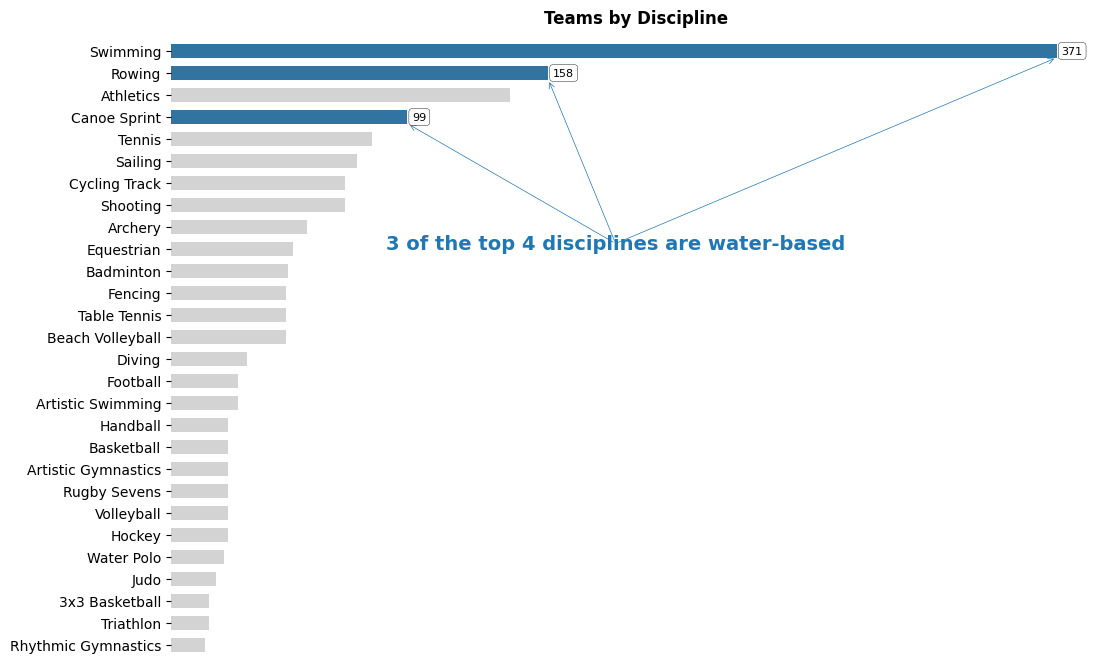

In [ ]:
discipline_counts = df_teams['discipline'].value_counts()
discipline_counts_df = pd.DataFrame(discipline_counts).reset_index()
discipline_counts_df.columns = ['Discipline', 'Number of Teams']
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)
highlight_disciplines = ['Swimming', 'Rowing', 'Canoe Sprint']
ocean_blue = '#1f77b4'
colors = []
for discipline in discipline_counts_df['Discipline']:
    if discipline in highlight_disciplines:
        colors.append(ocean_blue)
    else:
        colors.append('lightgray')
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top", "left", "bottom"]:
    ax0.spines[s].set_visible(False)
ax0_sns = sns.barplot(data=discipline_counts_df, y='Discipline', x='Number of Teams', ax=ax0, width=0.6, palette=colors)
ax0_sns.set_xlabel('')
ax0_sns.set_ylabel('')
ax0_sns.set_xticks([])
ax0_sns.grid(False)
for p, discipline in zip(ax0_sns.patches, discipline_counts_df['Discipline']):
    if discipline in highlight_disciplines:
        value = f'{p.get_width():.0f}'
        x = p.get_x() + p.get_width() + 2
        y = p.get_y() + p.get_height() / 2
        ax0.text(x, y, value, ha='left', va='center', fontsize=8,
                 bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
ax0_sns.text(0.5, 1.05, 'Teams by Discipline', fontsize=12, weight='bold', ha='center', va='top', transform=ax0.transAxes)
text_x = 90
text_y = 9
text = ax0.text(text_x, text_y, '3 of the top 4 disciplines are water-based', fontsize=14, weight='bold', ha='left', color=ocean_blue,
                bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
renderer = fig.canvas.get_renderer()
bbox = text.get_window_extent(renderer=renderer)
text_mid_x = (bbox.x0 + bbox.x1) / 2
text_mid_y = (bbox.y0 + bbox.y1) / 2
text_mid = ax0.transData.inverted().transform((text_mid_x, text_mid_y))
for i, discipline in enumerate(highlight_disciplines):
    bar_index = discipline_counts_df[discipline_counts_df['Discipline'] == discipline].index[0]
    bar_y = bar_index
    bar_x = discipline_counts_df['Number of Teams'][bar_index]
    arrow_color = colors[bar_index]
    ax0.annotate('', xy=(bar_x, bar_y + 0.3),xytext=text_mid,xycoords='data',textcoords='data',
        arrowprops=dict(facecolor=arrow_color, edgecolor=arrow_color, arrowstyle="->", lw=0.5),)
plt.show()

Upon examination of the data visualization chart it is apparent that Swimming is standing out as having a huge number of teams in comparison to other sports; 3 of the top 4 disciplines are water based which are Swimming, Rowing and Canoe Sprint, The dominance of these water related sports suggests a global interest with aquatic sports may driven by widespread popularities and also the presence of well developed facilities, From a business perspective this situation offers prospects, for focused marketing strategies and sponsorship opportunities

In [ ]:
country_counts = df_athletes['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']
highlighted_countries = ['USA', 'Germany', 'France', 'Netherlands', 'Italy', 'Spain', 'United Kingdom',
                         'China', 'Brazil', 'Australia', 'Canada', 'Japan', 'New Zealand', 'Poland','switzerland']
def get_country_count(country, country_counts):
    if country in country_counts['country'].values:
        return country_counts.loc[country_counts['country'] == country, 'count'].values[0]
    else:
        return 0
fig = go.Figure(data=go.Choropleth(locations=country_counts['country'],locationmode='country names',z=country_counts['count'],
    colorscale='Blues',marker_line_color='darkgray',marker_line_width=0.5,
    hovertemplate='<b>%{location}</b><br>Number of Athletes: %{z}<extra></extra>'
))
fig.add_trace(go.Choropleth(
    locations=highlighted_countries,
    locationmode='country names',
    z=[get_country_count(country, country_counts) for country in highlighted_countries],
    colorscale=[[0, 'lightblue'], [1, 'darkblue']],
    showscale=False,
    marker_line_color='black',
    marker_line_width=1.5,
    hoverinfo='skip'
))
fig.update_layout(
    title={'text': 'Athlete Representation by Country', 'y': 0.95,'x': 0.5,'xanchor': 'center','yanchor': 'top','font': dict(size=20, color='darkblue')},
    geo=dict(showframe=False,showcoastlines=True,coastlinecolor='white',projection_type='natural earth'),
    margin={"r":0,"t":50,"l":0,"b":0},
    annotations=[
        dict(x=0.8, y=0.1,xref='paper', yref='paper',text="Highlighted 200+ athletes countries",showarrow=False,font=dict(size=15, color="black"))])
fig.show()

The Choropleth map displaying athlete distribution highlights, Europe and North America as the leading regions in the participation numbers and sees active involvement from nations such as Brazil,Australia,China and Japan.On the other hand Africa and numerous Asian countries considerably lower athlete representation compared to Europe.

This suggests that there is a strong sports infrastructure and higher investment in athletics in the dominant regions making them stand out.While Africa and some parts of Asia seem to represent untapped markets with opportunities for development and investment

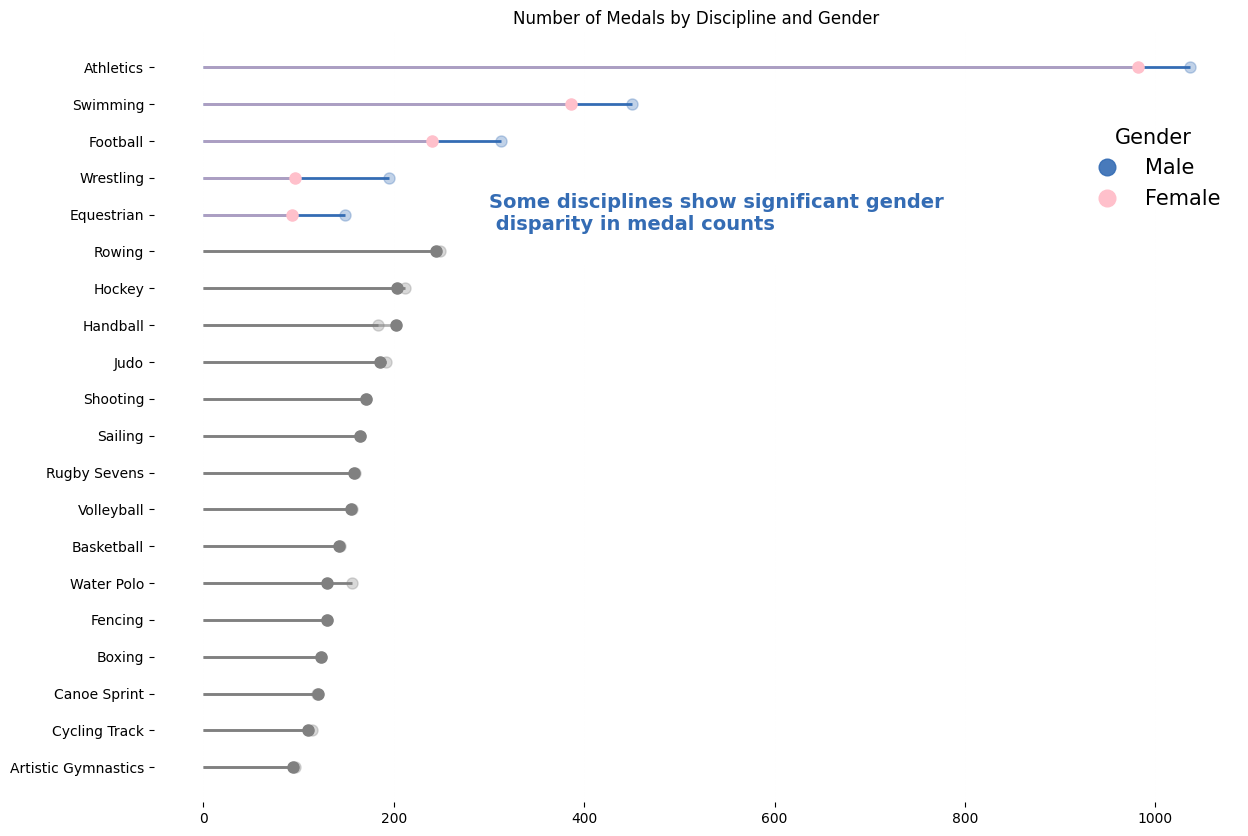

In [ ]:
def clean_index(value):
    return value.strip("[]'").title()
def normalize_name(name):
    return name.strip().lower()
medal_count_by_discipline_gender = df_athletes.groupby(['disciplines', 'gender']).size().unstack()
total_medals = medal_count_by_discipline_gender.sum(axis=1)
top_20_disciplines = total_medals.nlargest(20).index
filtered_medal_count_by_discipline_gender = medal_count_by_discipline_gender.loc[top_20_disciplines]
filtered_medal_count_by_discipline_gender.index = [clean_index(discipline) for discipline in filtered_medal_count_by_discipline_gender.index]
highlight_disciplines = ['Athletics', 'Swimming', 'Football', 'Wrestling', 'Equestrian']
highlight_disciplines_normalized = [normalize_name(discipline) for discipline in highlight_disciplines]
normalized_index = [normalize_name(discipline) for discipline in filtered_medal_count_by_discipline_gender.index]
ordered_disciplines = highlight_disciplines_normalized + [d for d in normalized_index if d not in highlight_disciplines_normalized]
index_map = {normalize_name(clean_index(d)): clean_index(d) for d in filtered_medal_count_by_discipline_gender.index}
ordered_disciplines_cleaned = [index_map[d] for d in ordered_disciplines]
filtered_medal_count_by_discipline_gender = filtered_medal_count_by_discipline_gender.loc[ordered_disciplines_cleaned]
plt.figure(figsize=(14, 10))
for discipline in filtered_medal_count_by_discipline_gender.index:
    is_highlighted = normalize_name(discipline) in highlight_disciplines_normalized
    color_male = '#346cb4' if is_highlighted else 'gray'
    plt.hlines(y=discipline, xmin=0, xmax=filtered_medal_count_by_discipline_gender.loc[discipline, 'Male'], color=color_male, alpha=1, linewidth=2)
    plt.plot(filtered_medal_count_by_discipline_gender.loc[discipline, 'Male'], discipline, "o", color=color_male, alpha=0.3, markersize=8)
    color_female = 'pink' if is_highlighted else 'gray'
    plt.hlines(y=discipline, xmin=0, xmax=filtered_medal_count_by_discipline_gender.loc[discipline, 'Female'], color=color_female, alpha=0.6, linewidth=2)
    plt.plot(filtered_medal_count_by_discipline_gender.loc[discipline, 'Female'], discipline, "o", color=color_female, markersize=8)
plt.title('Number of Medals by Discipline and Gender')
plt.plot([], [], 'o', color='#346cb4', alpha=0.9, markersize=8, label='Male')
plt.plot([], [], 'o', color='pink', markersize=8, label='Female')
plt.legend(title='Gender', frameon=False, bbox_to_anchor=(1, 0.9), fontsize=15, title_fontsize='15', markerscale=1.5)
plt.grid(axis='x', linestyle='--', alpha=0.01)
plt.gca().yaxis.grid(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().invert_yaxis()
text_x = 300
text_y = 5
plt.text(text_x, text_y, 'Some disciplines show significant gender\n disparity in medal counts\n', fontsize=14, weight='bold', ha='left', color='#346cb4',
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
plt.show()

male athletes have matched or surpassed female athletes in medal number in most of the top 20 sports categories, and there's a high percentage in Athletics, Swimming, Football, Wrestling, and Equestrian. This shows that there's a significant gender imbalance in some disciplines,which will be highlighting potential opportunities for targeted marketing and also sponsorship

In [ ]:
highlight_countries = ['France', 'Germany', 'Netherlands', 'Great Britain', 'Spain', 'Denmark']

default_color = 'gray'



num_highlighted = len(highlight_countries)

cmap = mcolors.LinearSegmentedColormap.from_list("orange_gradient", ["lightcoral", "darkorange"])

gradient_colors = [mcolors.to_hex(cmap(i / (num_highlighted - 1))) for i in range(num_highlighted)]



speed_sports = df_medalist[medalist['discipline'].isin(speed_sports_disciplines)]

top_10_countries_speed = speed_sports['country_code'].value_counts().head(10)

countries = top_10_countries_speed.index

medals_count = top_10_countries_speed.values



highlighted_countries = [country for country in countries if df_country.at[country, 'country'] in highlight_countries]

non_highlighted_countries = [country for country in countries if df_country.at[country, 'country'] not in highlight_countries]



highlighted_medals = [medals_count[countries.tolist().index(country)] for country in highlighted_countries]

non_highlighted_medals = [medals_count[countries.tolist().index(country)] for country in non_highlighted_countries]



sorted_countries = highlighted_countries + non_highlighted_countries

sorted_medals = highlighted_medals + non_highlighted_medals

sorted_colors = gradient_colors + [default_color] * len(non_highlighted_countries)



fig = go.Figure(go.Pie(labels=sorted_countries, values=sorted_medals,

                      hole=0.3,

                      marker=dict(colors=sorted_colors),

                      textinfo='label+percent',

                      insidetextorientation='radial',

                      sort=False))



fig.update_layout(title='Top 10 Countries in Speed Sports', showlegend=False)



fig.add_annotation(

    dict(x=0.5, y=0.8, text="50% of the speed sports medals Won by Europeans", showarrow=True, arrowhead=2, ax=0, ay=-100,

         font=dict(color='red', size=14), align="center", arrowcolor='red'))



fig.show()

The diagram shows that 50% of the speed sports medals are won by European countries, which shows the high dominance of these countries in this category of speed sports, This concentration of success will highlight Europe strong performance and also expertise in speed sports, which suggest potential opportunities for focused marketing and partnerships

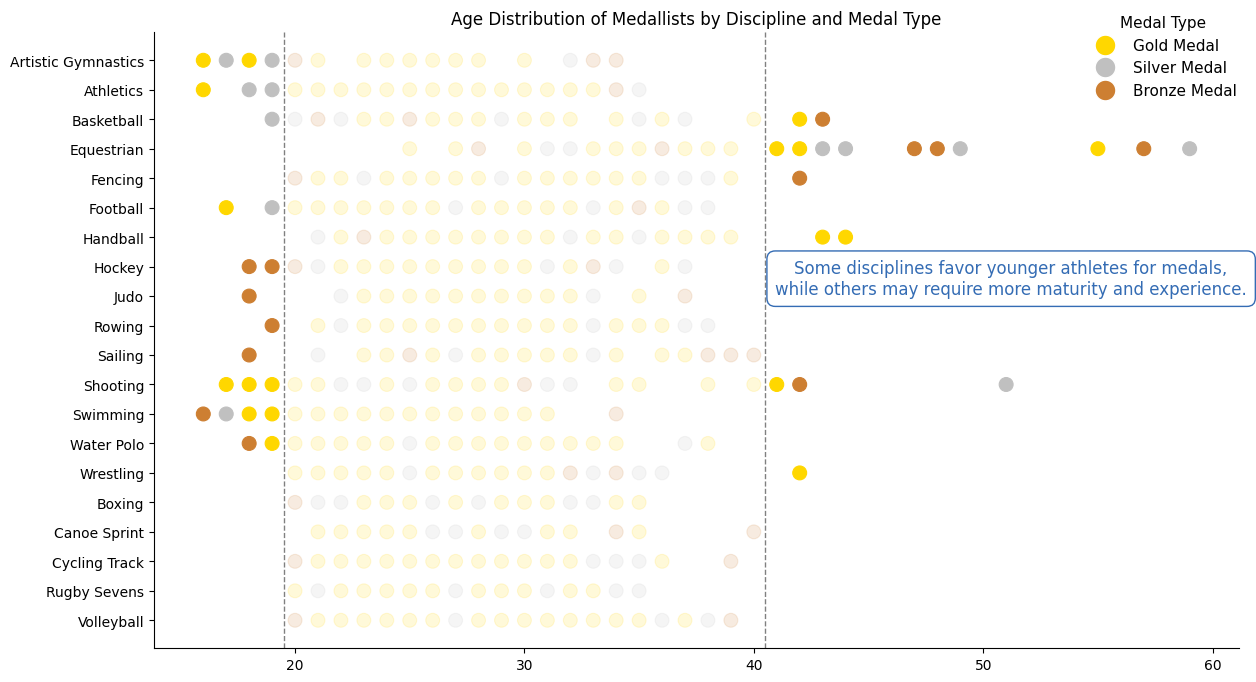

In [ ]:
df_medalist['birth_date'] = pd.to_datetime(medalist['birth_date'])

df_medalist['age'] = 2024 - df_medalist['birth_date'].dt.year



top_disciplines = df_medalist['discipline'].value_counts().head(20).index

filtered_data = df_medalist[medalist['discipline'].isin(top_disciplines)].copy()



medal_order = {'Gold Medal': 1, 'Silver Medal': 2, 'Bronze Medal': 3}

filtered_data['medal_rank'] = filtered_data['medal_type'].map(medal_order)



filtered_data = filtered_data.sort_values(['discipline', 'age', 'medal_rank'])

filtered_data = filtered_data.drop_duplicates(subset=['discipline', 'age'], keep='first')

filtered_data['age_group'] = np.where((filtered_data['age'] < 20) | (filtered_data['age'] > 40), 'Extreme Age', 'Normal Age')



palette_medal = {'Gold Medal': '#FFD700', 'Silver Medal': '#C0C0C0', 'Bronze Medal': '#CD7F32'}



plt.figure(figsize=(14, 8))



sns.scatterplot(data=filtered_data[filtered_data['age_group'] == 'Extreme Age'],

                x='age', y='discipline', hue='medal_type', s=100,

                palette=palette_medal, edgecolor=None, legend=False, marker='o')



sns.scatterplot(data=filtered_data[filtered_data['age_group'] == 'Normal Age'],

                x='age', y='discipline', hue='medal_type', s=100,

                palette=palette_medal, alpha=0.15, edgecolor=None, marker='o')



plt.axvline(x=19.5, color='gray', linestyle='--', linewidth=1)

plt.axvline(x=40.5, color='gray', linestyle='--', linewidth=1)



plt.annotate('Some disciplines favor younger athletes for medals,\nwhile others may require more maturity and experience.',

    xy=(0.79, 0.6), xycoords='axes fraction', ha='center', va='center', fontsize=12,

    color='#346cb4', bbox=dict(facecolor='white', edgecolor='#346cb4', boxstyle='round,pad=0.5'))



plt.title('Age Distribution of Medallists by Discipline and Medal Type')



handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=medal_type)

           for medal_type, color in palette_medal.items()]



plt.legend(handles=handles, title='Medal Type', bbox_to_anchor=(0.85, 1.05), loc='upper left', frameon=False,

           fontsize=11, title_fontsize='11', markerscale=1.5)



plt.grid(False)

sns.despine()

plt.xlabel('')

plt.ylabel('')

plt.show()

The scatter plot indicates that athletes aged between 20 and 40 tend to have a probability of winning medals in most sports due to a combination of experience and also physic at their peak levels